In [1]:
#data format library
import h5py

#numpy
import numpy as np
import pandas as pd
import numpy.ma as ma
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)
plt.rcParams["font.family"] = "Times New Roman"
# %matplotlib notebook
import sys
sys.path.append('/Users/gautam.sridhar/Documents/Repos/Markov_Fish/utils/')
import matplotlib.colors as pltcolors
import os
import copy
import clustering_methods as cl
import operator_calculations as op_calc
import delay_embedding as embed
import stats
import time

np.random.seed(42)

import importlib
importlib.reload(op_calc)

<module 'operator_calculations' from '/Users/gautam.sridhar/Documents/Repos/Markov_Fish/utils/operator_calculations.py'>

In [14]:
path_to_filtered_data = '/Users/gautam.sridhar/Documents/Repos/ZebraBouts/Results/'
f = h5py.File(path_to_filtered_data + 'pool_ex8_PCs/Cross_val.h5')
print(f.keys())
best_alphas = np.array(f['best_alphas'])
test_acc = np.array(f['test_acc'])
train_acc = np.array(f['train_acc'])
conf_matrices_full = np.array(f['conf_matrices'])
# labels_fish_allrec = ma.array(f['labels_fish'],dtype=int)
# state_trajs = ma.array(f['state_trajs'])
f.close()

<KeysViewHDF5 ['best_alphas', 'conf_matrices', 'test_acc', 'train_acc']>


In [15]:
model_test_acc = []
for i in range(33):
    model_test_acc.append(test_acc[i*100:i*100+100])
    
model_train_acc = []
for i in range(33):
    model_train_acc.append(train_acc[i*100:i*100+100])

In [16]:
n_states = np.array([2,3,4,5,6,7,8,9])
n_states = np.append(n_states, np.round(np.logspace(1,3,25,base=10)).astype(int))

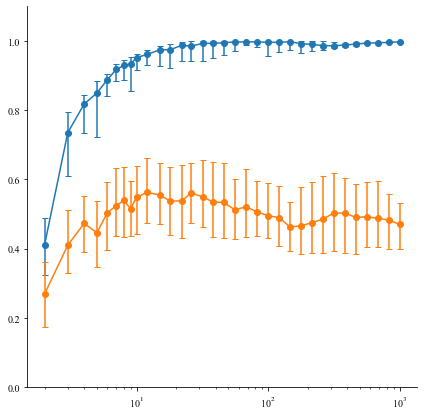

In [17]:
# Accuracy train v test

fig, ax = plt.subplots(1,1, figsize=(7,7))
mean,cil,ciu = np.vstack(model_train_acc).mean(axis=1),np.percentile(np.vstack(model_train_acc),2.5,axis=1),np.percentile(np.vstack(model_train_acc),97.5,axis=1)
ax.errorbar(n_states,mean,yerr = [mean-cil,ciu-mean],marker='o',capsize=3)

mean,cil,ciu = np.vstack(model_test_acc).mean(axis=1),np.percentile(np.vstack(model_test_acc),2.5,axis=1),np.percentile(np.vstack(model_test_acc),97.5,axis=1)

ax.errorbar(n_states,mean,yerr = [mean-cil,ciu-mean],marker='o',capsize=3)
ax.set_xscale('log')
ax.set_ylim(0,1.1)
# ax.axhline(accuracy_score(y_test, np.random.choice(y_test, len(y_test) ,replace=False)),c='k')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.savefig('/Users/gautam.sridhar/Documents/ZENITH/Figures/Fig4/Nstate_logreg_new.pdf')

# plt.xlim(0,20)

In [18]:
print(conf_matrices_full[i].shape)

(14, 14)


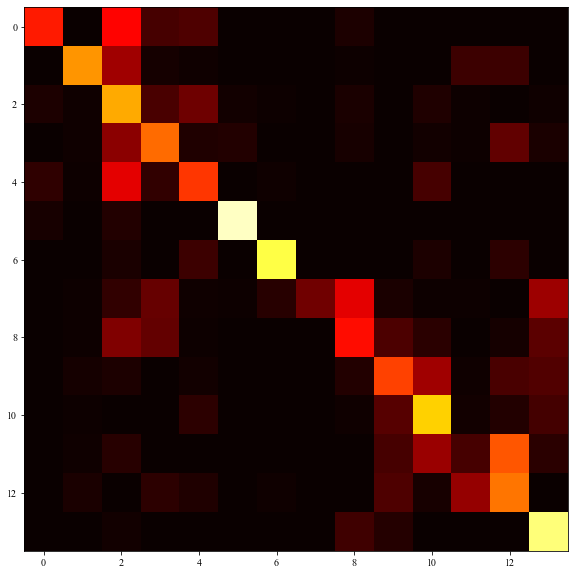

In [19]:
# Confusion Matrix at particular q

fig,ax = plt.subplots(1,1, figsize=(10,10))

normcfs = []
for i in range(1100,1200):
    normcfs.append(conf_matrices_full[i]/np.sum(conf_matrices_full[i],axis=1)[:,np.newaxis])
avg_normcf = np.mean(normcfs,axis=0)

# normcf = conf_matrices_full[304]/np.sum(conf_matrices_full[304],axis=1)[:,np.newaxis]
a = ax.imshow(avg_normcf, cmap='hot', vmax = 1., vmin=0.)
# plt.savefig('/Users/gautam.sridhar/Documents/ZENITH/Figures/Fig4/qstate_conf_mar.pdf')


# fig.colorbar(a)